In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [ ]:
# creating 100 data samples
n_pts = 500
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise = 0.1, factor = 0.2)
# datasets.make_circles(), Make a large circle containing a smaller circle in 2d.

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))

In [ ]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])

In [ ]:
def scatter_plot1():
  plt.scatter(X[y==1, 0], X[y==1, 1])

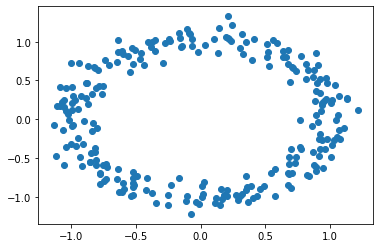

In [ ]:
scatter_plot()

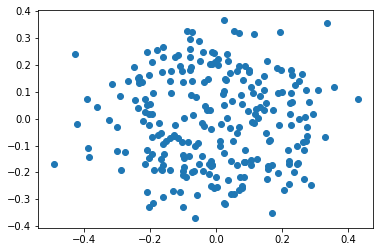

In [ ]:
scatter_plot1()

In [ ]:
def scatter_plot2():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

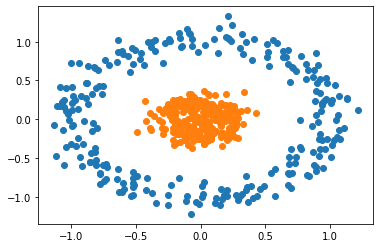

In [ ]:
scatter_plot2()

In [ ]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
      super().__init__()
      self.linear = nn.Linear(input_size, H1)
      self.linear2 = nn.Linear(H1, output_size)

  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [ ]:
from torch.random import manual_seed
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1) #adaptive gradient decent method

In [ ]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  #print("epoch:", i, "loss", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


epoch: 0 loss 0.03219417855143547
epoch: 1 loss 0.03053552471101284
epoch: 2 loss 0.02900422178208828
epoch: 3 loss 0.027608316391706467
epoch: 4 loss 0.026248469948768616
epoch: 5 loss 0.024970540776848793
epoch: 6 loss 0.023766178637742996
epoch: 7 loss 0.022605037316679955
epoch: 8 loss 0.021522535011172295
epoch: 9 loss 0.020521612837910652
epoch: 10 loss 0.01957591623067856
epoch: 11 loss 0.018680959939956665
epoch: 12 loss 0.01784345880150795
epoch: 13 loss 0.017055245116353035
epoch: 14 loss 0.016307106241583824
epoch: 15 loss 0.015602769330143929
epoch: 16 loss 0.014944723807275295
epoch: 17 loss 0.014326531440019608
epoch: 18 loss 0.013742820359766483
epoch: 19 loss 0.013193642720580101
epoch: 20 loss 0.012678026221692562
epoch: 21 loss 0.012191261164844036
epoch: 22 loss 0.01172972097992897
epoch: 23 loss 0.011293451301753521
epoch: 24 loss 0.010882914997637272
epoch: 25 loss 0.010496200062334538
epoch: 26 loss 0.010130546055734158
epoch: 27 loss 0.009784499183297157
epoch: 2

Text(0.5, 0, 'epoch')

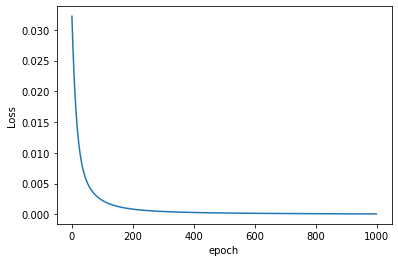

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [ ]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]), max(X[:, 0])) #min(X[:, 0]) give us the first value of x-axis; max(X[:, 0]) return the max value of x-axis
  y_span = np.linspace(min(X[:, 1]), max(X[:, 1]))
  print(x_span)

In [ ]:
plot_decision_boundary(X, y)

[-1.13339265 -1.08546    -1.03752735 -0.98959471 -0.94166206 -0.89372941
 -0.84579676 -0.79786411 -0.74993147 -0.70199882 -0.65406617 -0.60613352
 -0.55820088 -0.51026823 -0.46233558 -0.41440293 -0.36647028 -0.31853764
 -0.27060499 -0.22267234 -0.17473969 -0.12680704 -0.0788744  -0.03094175
  0.0169909   0.06492355  0.11285619  0.16078884  0.20872149  0.25665414
  0.30458679  0.35251943  0.40045208  0.44838473  0.49631738  0.54425002
  0.59218267  0.64011532  0.68804797  0.73598062  0.78391326  0.83184591
  0.87977856  0.92771121  0.97564386  1.0235765   1.07150915  1.1194418
  1.16737445  1.21530709]
